In [27]:
# -*- coding: utf-8 -*-
"""
Created on Tue Dec 24 02:24:12 2019

@author: Admin
"""

import pandas as pd
import numpy as np

from scipy.signal import savgol_filter, argrelextrema
import openpyxl

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

import pickle
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix

import warnings,os
warnings.simplefilter('ignore')

import matplotlib as mpl
import matplotlib.dates as mdates
import datetime as dt
import csv

import seaborn as sns
import matplotlib.pyplot as plt

from pylab import rcParams

path="C:\\Users\\Admin\\Documents\\"

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [31]:
def CreateData(dataFrame):
    print(dataFrame.shape)
    dataset =np.array( dataFrame.iloc[:, 0:dataFrame.shape[1]-1])
    target = dataFrame.iloc[:,dataFrame.shape[1]-1:dataFrame.shape[1]]
    target = np.array(target.replace(to_replace=['О', 'К'], value=[1, 0]))
    target =target.astype('int32')   
    target.transpose()
    return dataset,target

In [32]:
#сохранение
def saveModel(score,path,nameModel):
    save=False
    dateFile = os.listdir(path)
    name=path+ str(score)+'_'+nameModel+'.pkl'
    for item in dateFile:
        temp=item.split('_')
        if len(temp)==2:
            if (temp[1].find(nameModel)!=-1):
                if (float(temp[0])<score):
                    print("Модель",nameModel,"сохранена\n")
                    save=True
                break
    else:
        save=True
    return save,name

In [33]:
# path="C:\\Users\\admin\\Downloads\\Telegram Desktop\\new_sav_filter_data_scaled.xlsx"
name = "sav_filter_data_scaled__5.xlsx"
path="C:\\Users\\admin\\Documents\\PythonRamanCopy\\"+name
dataFrame = pd.read_excel(path)
clear_data, target=CreateData(dataFrame)
target = target.ravel()

(980, 655)


# Блок отбора признаков

In [34]:
"""пока пусто"""
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import ExtraTreesClassifier

'пока пусто'

Best parameter (CV score=0.587):
{'logistic__C': 0.0001, 'logistic__n_jobs': -1, 'logistic__penalty': 'l2', 'pca__n_components': 4}


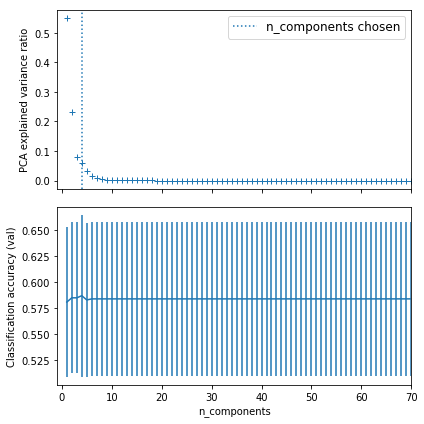

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


In [35]:
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [item for item in range(1,100,1)],
    'logistic__C': np.logspace(-4, 4, 4),
    'logistic__penalty': ['l2'],
    'logistic__n_jobs': [-1]
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(clear_data, target)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(clear_data)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

pca_2 = PCA(n_components =search.best_estimator_.named_steps['pca'].n_components).fit(clear_data)
print(pca_2)
clear_data_out = pca_2.transform(clear_data)

# Анализ новой выборки

https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html

,0,1,2,3
0,1.000000e+00,-1.186024e-16,5.164068e-16,-5.617268e-16
1,-1.186024e-16,1.000000e+00,3.708325e-16,-5.926329e-17
2,5.164068e-16,3.708325e-16,1.000000e+00,5.537415e-17
3,-5.617268e-16,-5.926329e-17,5.537415e-17,1.000000e+00


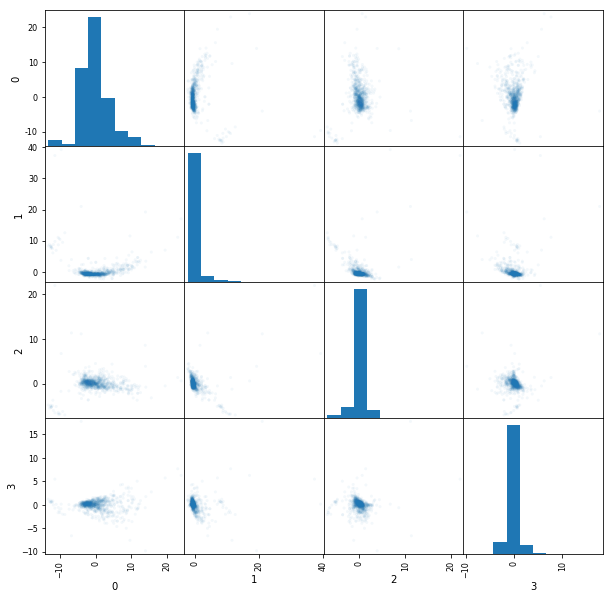

In [36]:
from pandas.tools.plotting import scatter_matrix
pd_clear_data_out = pd.DataFrame(data=clear_data_out[0:,0:],    # values
              index=range(0, len(clear_data_out)),    # 1st column as index
              columns=range(0, len(clear_data_out[0])))
                                 
scatter_matrix(pd_clear_data_out, alpha=0.05, figsize=(10, 10))
pd_clear_data_out.corr()

# Используем все данные в обучающей выборке

Чтоб не переписывать код присвоим переменным normalized_test_dataset, test_target значения всей выборки

In [37]:
normalized_train_dataset = clear_data_out
train_target = target

normalized_test_dataset = clear_data_out
test_target = target

spec=[]
ch=[]
Score=[]

In [38]:
all_models = {
    'lgModel':None,
    'sgv_classifier':None,
    'linear_svc':None,
    'nu_svc':None,
    'k_neighbors':None,
    'rdf_model':None,
}

# Логическая регрессия
LogisticRegression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Логическая регрессия

0.4091836734693878 0.0001 

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.55      0.47      0.51       444
           1       0.61      0.68      0.64       536

   micro avg       0.59      0.59      0.59       980
   macro avg       0.58      0.58      0.58       980
weighted avg       0.58      0.59      0.58       980

Точноть 0.5867346938775511
Специфичность 0.47072072072072074
Чувствительность 0.6828358208955224
--------------
f1ScoreWeighted= 0.5822277551203606
f1ScoreMacro= 0.5758487033409528
f1ScoreBinary= 0.6437994722955145


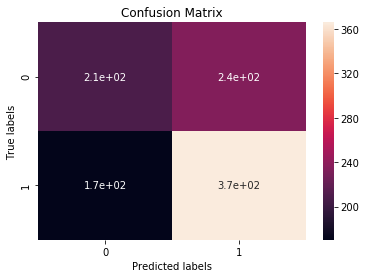

In [39]:
from sklearn.linear_model import LogisticRegression
#Логическая регрессия
print("Логическая регрессия\n")

#GridSearchCV
tuned_parameters = {'C': np.logspace(-4, 4, 4),
                    'penalty': ['l2'],
                    'n_jobs': [-1]}
grid = GridSearchCV(LogisticRegression(solver='liblinear'), tuned_parameters, 
                   cv=5, scoring="accuracy")
grid.fit(normalized_train_dataset, train_target)

best_cv_err2 = 1 - grid.best_score_
best_parameter = grid.best_estimator_.C
print (best_cv_err2, best_parameter,"\n")

#Обучение модели с оптимальными параметрами
all_models['lgModel'] = LogisticRegression(C=grid.best_estimator_.C,
                            penalty=grid.best_estimator_.penalty,
                             n_jobs=grid.best_estimator_.n_jobs,
                            )
print(all_models['lgModel'])
print('--------------------------------------------------------')
all_models['lgModel'].fit(normalized_train_dataset, train_target)

expected = test_target
predicted = all_models['lgModel'].predict(normalized_test_dataset)

#Отрисовка confusion_matrix
cm = metrics.confusion_matrix(expected, predicted)

spec1=cm[0][0]/(cm[0][0]+cm[0][1])
spec.append(spec1)
ch1=cm[1][1]/(cm[1][0]+cm[1][1])
ch.append(ch1)
buff_score=all_models['lgModel'].score(normalized_test_dataset, test_target)

print(metrics.classification_report(expected, predicted))

print('Точноть',buff_score)
print('Специфичность',spec1)
print('Чувствительность',ch1)
print('--------------')  

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['К', 'О']); 
# ax.xaxis.set_ticklabels(['К', 'О']); 

f1ScoreWeighted=f1_score(test_target, predicted, average='weighted')
print("f1ScoreWeighted=",f1ScoreWeighted)

f1ScoreMacro=f1_score(test_target, predicted, average='macro')
print("f1ScoreMacro=",f1ScoreMacro)

f1ScoreBinary=f1_score(test_target, predicted, average='binary')
print("f1ScoreBinary=",f1ScoreBinary)

Score.append(buff_score)


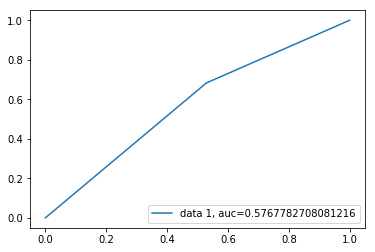

In [40]:
fpr, tpr, _ = metrics.roc_curve(expected,  predicted)
auc = metrics.roc_auc_score(expected, predicted)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Stochastic Gradient Descent
Stochastic Gradient Descent

Документация:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier

доп инфо:
https://scikit-learn.org/stable/modules/sgd.html

Stochastic Gradient Descent


            best_parameter_alpha: 0.1
 
            best_parameter_n_iter: 1000

            best_parameter_loss: squared_loss
 
            best_parameter_penalty: elasticnet
 
            best_parameter_n_jobs: -1

        
---------------------------------------------------------------
SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='squared_loss',
       max_iter=None, n_iter=1000, n_iter_no_change=5, n_jobs=-1,
       penalty='elasticnet', power_t=0.5, random_state=None, shuffle=True,
       tol=None, validation_fraction=0.1, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.63      0.28      0.39       444
           1       0.59      0.87      0.70       536

   micro avg       0.60      0.60      0.60       980
   macro avg       0.61      0.57      0.55       9

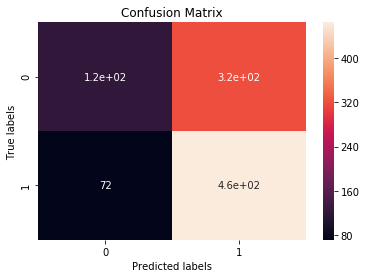

In [41]:
from sklearn.linear_model import SGDClassifier
#Stochastic Gradient Descent
print("Stochastic Gradient Descent\n")

#GridSearchCV
tuned_parameters = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'n_iter': [1000], # number of epochs
    'loss': ['log', 
             'hinge', 
             'modified_huber', 
             'squared_hinge', 
             'perceptron',
             'squared_loss',
              'epsilon_insensitive',
            ], # logistic regression,
    'penalty': ['l2','l1', 'elasticnet'],
    'n_jobs': [-1]
}
grid = GridSearchCV(SGDClassifier(), tuned_parameters, 
                   cv=5, scoring="accuracy")
grid.fit(normalized_train_dataset, train_target)

best_cv_err2 = 1 - grid.best_score_
best_parameter_alpha = grid.best_estimator_.alpha
best_parameter_n_iter = grid.best_estimator_.n_iter
best_parameter_loss = grid.best_estimator_.loss
best_parameter_penalty = grid.best_estimator_.penalty
best_parameter_n_jobs = grid.best_estimator_.n_jobs
print ("""
            best_parameter_alpha: {best_parameter_alpha}\n 
            best_parameter_n_iter: {best_parameter_n_iter}\n
            best_parameter_loss: {best_parameter_loss}\n 
            best_parameter_penalty: {best_parameter_penalty}\n 
            best_parameter_n_jobs: {best_parameter_n_jobs}\n
        """.format(
                best_parameter_alpha= best_parameter_alpha, 
                best_parameter_n_iter= best_parameter_n_iter, 
                best_parameter_loss= best_parameter_loss, 
                best_parameter_penalty= best_parameter_penalty, 
                best_parameter_n_jobs= best_parameter_n_jobs, 
    ))


#Обучение модели с оптимальными параметрами
all_models['sgv_classifier'] = SGDClassifier(alpha= best_parameter_alpha, 
        n_iter= best_parameter_n_iter, 
        loss= best_parameter_loss, 
        penalty= best_parameter_penalty, 
        n_jobs= best_parameter_n_jobs)
print('---------------------------------------------------------------')
print(all_models['sgv_classifier'])
all_models['sgv_classifier'].fit(normalized_train_dataset, train_target)

expected = test_target
predicted = all_models['sgv_classifier'].predict(normalized_test_dataset)

#Отрисовка confusion_matrix
cm = metrics.confusion_matrix(expected, predicted)

spec1=cm[0][0]/(cm[0][0]+cm[0][1])
spec.append(spec1)
ch1=cm[1][1]/(cm[1][0]+cm[1][1])
ch.append(ch1)
buff_score=all_models['sgv_classifier'].score(normalized_test_dataset, test_target)

print(metrics.classification_report(expected, predicted))

print('Точноть',buff_score)
print('Специфичность',spec1)
print('Чувствительность',ch1)
print('--------------')  

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

f1ScoreWeighted=f1_score(test_target, predicted, average='weighted')
print("f1ScoreWeighted=",f1ScoreWeighted)

f1ScoreMacro=f1_score(test_target, predicted, average='macro')
print("f1ScoreMacro=",f1ScoreMacro)

f1ScoreBinary=f1_score(test_target, predicted, average='binary')
print("f1ScoreBinary=",f1ScoreBinary)


Score.append(buff_score)

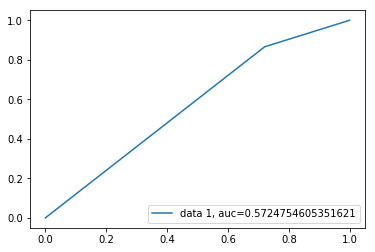

In [42]:
fpr, tpr, _ = metrics.roc_curve(expected,  predicted)
auc = metrics.roc_auc_score(expected, predicted)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# LinearSVC


            best_cv_err2: 0.42653061224489797

            C: 1
 
        
LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
              precision    recall  f1-score   support

           0       0.62      0.29      0.40       444
           1       0.59      0.85      0.70       536

   micro avg       0.60      0.60      0.60       980
   macro avg       0.61      0.57      0.55       980
weighted avg       0.61      0.60      0.56       980

Точноть 0.6
Специфичность 0.2927927927927928
Чувствительность 0.8544776119402985
--------------
f1ScoreWeighted= 0.5636929888745051
f1ScoreMacro= 0.5495394082662614
f1ScoreBinary= 0.7003058103975535


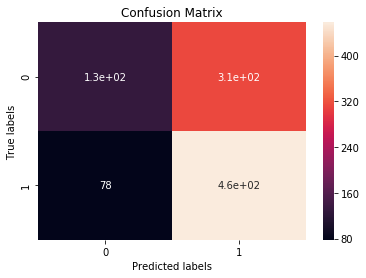

In [43]:
from sklearn.svm import LinearSVC
#LinearSVC

#GridSearchCV

tuned_parameters = {'C': [1, 10, 100, 1000]}

grid = GridSearchCV(LinearSVC(), tuned_parameters, 
                   cv=5, scoring="accuracy")

grid.fit(normalized_train_dataset, train_target)

best_cv_err2 = 1 - grid.best_score_
C = grid.best_estimator_.C
print ("""
            best_cv_err2: {best_cv_err2}\n
            C: {C}\n 
        """.format(
                best_cv_err2= best_cv_err2, 
                C= C, 
    ))


#Обучение модели с оптимальными параметрами
all_models['linear_svc'] = LinearSVC(C= C)
print(all_models['linear_svc'])
all_models['linear_svc'].fit(normalized_train_dataset, train_target)

expected = test_target
predicted = all_models['linear_svc'].predict(normalized_test_dataset)
predicted_sgv_classifier=predicted

#Отрисовка confusion_matrix
cm = metrics.confusion_matrix(expected, predicted)

spec1=cm[0][0]/(cm[0][0]+cm[0][1])
spec.append(spec1)
ch1=cm[1][1]/(cm[1][0]+cm[1][1])
ch.append(ch1)
buff_score=all_models['linear_svc'].score(normalized_test_dataset, test_target)

print(metrics.classification_report(expected, predicted))

print('Точноть',buff_score)
print('Специфичность',spec1)
print('Чувствительность',ch1)
print('--------------')  

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

f1ScoreWeighted=f1_score(test_target, predicted, average='weighted')
print("f1ScoreWeighted=",f1ScoreWeighted)

f1ScoreMacro=f1_score(test_target, predicted, average='macro')
print("f1ScoreMacro=",f1ScoreMacro)

f1ScoreBinary=f1_score(test_target, predicted, average='binary')
print("f1ScoreBinary=",f1ScoreBinary)


Score.append(buff_score)

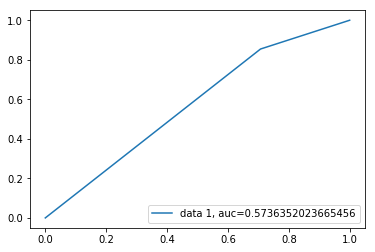

In [44]:
fpr, tpr, _ = metrics.roc_curve(expected,  predicted)
auc = metrics.roc_auc_score(expected, predicted)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Nu-Support Vector Classification
Similar to SVC but uses a parameter to control the number of support vectors.

The implementation is based on libsvm.
https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html


            best_cv_err2: 0.4285714285714286

            kernel: linear

            nu: 0.6500000000000001
 
        
NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='linear', max_iter=-1, nu=0.6500000000000001, probability=True,
   random_state=None, shrinking=True, tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.66      0.14      0.23       444
           1       0.57      0.94      0.71       536

   micro avg       0.58      0.58      0.58       980
   macro avg       0.61      0.54      0.47       980
weighted avg       0.61      0.58      0.49       980

Точноть 0.5775510204081633
Специфичность 0.13963963963963963
Чувствительность 0.9402985074626866
--------------
f1ScoreWeighted= 0.49212646895848355
f1ScoreMacro= 0.46967201543456777
f1ScoreBinary= 0.7088607594936709


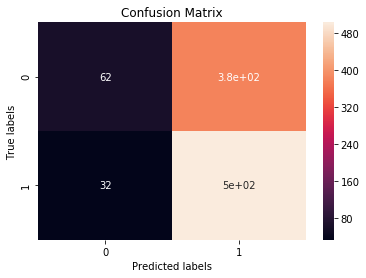

In [45]:
from sklearn.svm import NuSVC
#LinearSVC

#GridSearchCV

tuned_parameters = {'nu':np.arange(.05,0.95,0.05),
                    'kernel': ['linear']
                   }

grid = GridSearchCV(NuSVC(), tuned_parameters, 
                   cv=5, scoring="accuracy")

grid.fit(normalized_train_dataset, train_target)

best_cv_err2 = 1 - grid.best_score_
kernel = grid.best_estimator_.kernel
nu = grid.best_estimator_.nu
print ("""
            best_cv_err2: {best_cv_err2}\n
            kernel: {kernel}\n
            nu: {nu}\n 
        """.format(
                best_cv_err2= best_cv_err2, 
                kernel= kernel, 
                nu= nu, 
    ))


#Обучение модели с оптимальными параметрами
all_models['nu_svc'] = NuSVC(kernel= kernel,nu=nu,probability=True)
print(all_models['nu_svc'])
all_models['nu_svc'].fit(normalized_train_dataset, train_target)

expected = test_target
predicted = all_models['nu_svc'].predict(normalized_test_dataset)
predicted_sgv_classifier=predicted

#Отрисовка confusion_matrix
cm = metrics.confusion_matrix(expected, predicted)

spec1=cm[0][0]/(cm[0][0]+cm[0][1])
spec.append(spec1)
ch1=cm[1][1]/(cm[1][0]+cm[1][1])
ch.append(ch1)
buff_score=all_models['nu_svc'].score(normalized_test_dataset, test_target)

print(metrics.classification_report(expected, predicted))

print('Точноть',buff_score)
print('Специфичность',spec1)
print('Чувствительность',ch1)
print('--------------')  

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

f1ScoreWeighted=f1_score(test_target, predicted, average='weighted')
print("f1ScoreWeighted=",f1ScoreWeighted)

f1ScoreMacro=f1_score(test_target, predicted, average='macro')
print("f1ScoreMacro=",f1ScoreMacro)

f1ScoreBinary=f1_score(test_target, predicted, average='binary')
print("f1ScoreBinary=",f1ScoreBinary)


Score.append(buff_score)

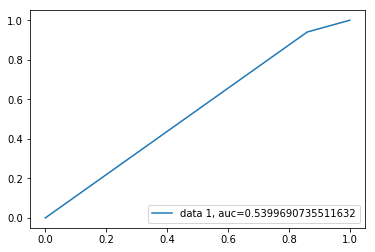

In [46]:
fpr, tpr, _ = metrics.roc_curve(expected,  predicted)
auc = metrics.roc_auc_score(expected, predicted)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Создание модели КNN


            best_cv_err2: 0.40306122448979587

            n_neighbors: 79
 
        
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=79, p=2,
           weights='uniform')
              precision    recall  f1-score   support

           0       0.66      0.28      0.40       444
           1       0.60      0.88      0.71       536

   micro avg       0.61      0.61      0.61       980
   macro avg       0.63      0.58      0.55       980
weighted avg       0.63      0.61      0.57       980

Точноть 0.610204081632653
Специфичность 0.28378378378378377
Чувствительность 0.8805970149253731
--------------
f1ScoreWeighted= 0.5694553288435005
f1ScoreMacro= 0.5546959380694767
f1ScoreBinary= 0.7119155354449472


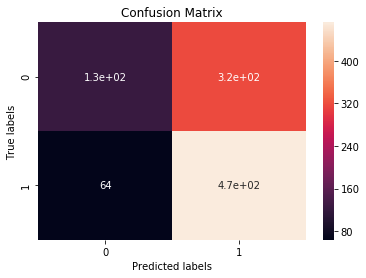

In [47]:
from sklearn.neighbors import KNeighborsClassifier

tuned_parameters = {'n_neighbors': list(range(1,100))}

grid = GridSearchCV(KNeighborsClassifier(), tuned_parameters, 
                   cv=5, scoring="accuracy")

grid.fit(normalized_train_dataset, train_target)

best_cv_err2 = 1 - grid.best_score_
n_neighbors = grid.best_estimator_.n_neighbors
print ("""
            best_cv_err2: {best_cv_err2}\n
            n_neighbors: {n_neighbors}\n 
        """.format(
                best_cv_err2= best_cv_err2, 
                n_neighbors= n_neighbors, 
    ))


#Обучение модели с оптимальными параметрами
all_models['k_neighbors'] = KNeighborsClassifier(n_neighbors = n_neighbors)
print(all_models['k_neighbors'])
all_models['k_neighbors'].fit(normalized_train_dataset, train_target)

expected = test_target
predicted = all_models['k_neighbors'].predict(normalized_test_dataset)

#Отрисовка confusion_matrix
cm = metrics.confusion_matrix(expected, predicted)

spec1=cm[0][0]/(cm[0][0]+cm[0][1])
spec.append(spec1)
ch1=cm[1][1]/(cm[1][0]+cm[1][1])
ch.append(ch1)
buff_score=all_models['k_neighbors'].score(normalized_test_dataset, test_target)

print(metrics.classification_report(expected, predicted))

print('Точноть',buff_score)
print('Специфичность',spec1)
print('Чувствительность',ch1)
print('--------------')  

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

f1ScoreWeighted=f1_score(test_target, predicted, average='weighted')
print("f1ScoreWeighted=",f1ScoreWeighted)

f1ScoreMacro=f1_score(test_target, predicted, average='macro')
print("f1ScoreMacro=",f1ScoreMacro)

f1ScoreBinary=f1_score(test_target, predicted, average='binary')
print("f1ScoreBinary=",f1ScoreBinary)


Score.append(buff_score)

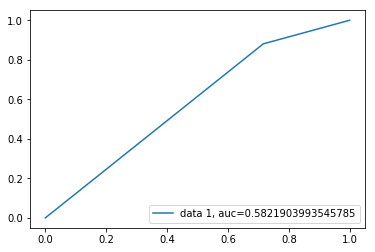

In [48]:
fpr, tpr, _ = metrics.roc_curve(expected,  predicted)
auc = metrics.roc_auc_score(expected, predicted)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Случайный лес


            n_estimators: 63

            max_features: sqrt
 
        
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=63, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       444
           1       1.00      1.00      1.00       536

   micro avg       1.00      1.00      1.00       980
   macro avg       1.00      1.00      1.00       980
weighted avg       1.00      1.00      1.00       980

Точноть 0.9979591836734694
Специфичность 1.0
Чувствительность 0.996268656716418
--------------
f1ScoreWeighted= 0.9979595694205438
f1ScoreMacro= 0.9979418250551297
f1ScoreBinary= 0.9981308411

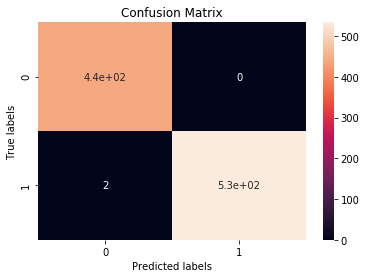

In [49]:
from sklearn.ensemble import RandomForestClassifier

tuned_parameters = {'n_estimators': np.arange(10,100),'max_features': ['auto', 'sqrt', 'log2']}

rdf = RandomForestClassifier(n_jobs=-1, oob_score = True) 

grid = GridSearchCV(rdf, tuned_parameters, 
                   cv=5, scoring="accuracy")

grid.fit(normalized_train_dataset, train_target)

best_cv_err2 = 1 - grid.best_score_
n_estimators = grid.best_estimator_.n_estimators
max_features = grid.best_estimator_.max_features
print ("""
            n_estimators: {n_estimators}\n
            max_features: {max_features}\n 
        """.format(
                best_cv_err2= best_cv_err2, 
                n_estimators= n_estimators, 
                max_features= max_features, 
    ))


#Обучение модели с оптимальными параметрами
all_models['rdf_model'] = RandomForestClassifier(n_estimators = n_estimators,
                                   max_features=max_features,
                                   n_jobs=-1, 
                                   oob_score = True
                                  )
print(all_models['rdf_model'])
all_models['rdf_model'].fit(normalized_train_dataset, train_target)

expected = test_target
predicted = all_models['rdf_model'].predict(normalized_test_dataset)
predicted_sgv_classifier=predicted

#Отрисовка confusion_matrix
cm = metrics.confusion_matrix(expected, predicted)

spec1=cm[0][0]/(cm[0][0]+cm[0][1])
spec.append(spec1)
ch1=cm[1][1]/(cm[1][0]+cm[1][1])
ch.append(ch1)
buff_score=all_models['rdf_model'].score(normalized_test_dataset, test_target)

print(metrics.classification_report(expected, predicted))

print('Точноть',buff_score)
print('Специфичность',spec1)
print('Чувствительность',ch1)
print('--------------')  

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

f1ScoreWeighted=f1_score(test_target, predicted, average='weighted')
print("f1ScoreWeighted=",f1ScoreWeighted)

f1ScoreMacro=f1_score(test_target, predicted, average='macro')
print("f1ScoreMacro=",f1ScoreMacro)

f1ScoreBinary=f1_score(test_target, predicted, average='binary')
print("f1ScoreBinary=",f1ScoreBinary)


Score.append(buff_score)

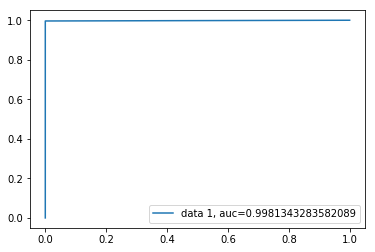

In [50]:
fpr, tpr, _ = metrics.roc_curve(expected,  predicted)
auc = metrics.roc_auc_score(expected, predicted)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Оценка обученных классификаторов 

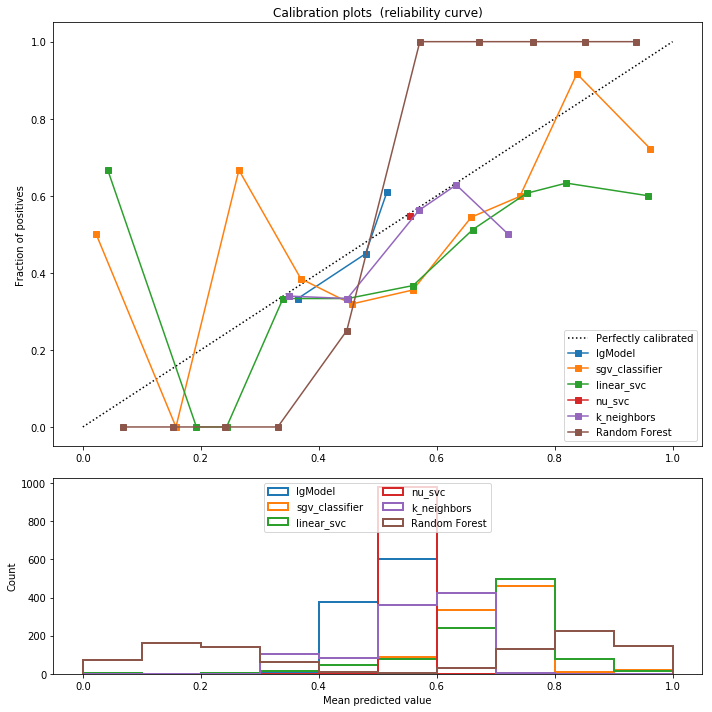

In [51]:
np.random.seed(0)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.calibration import calibration_curve

# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(all_models['lgModel'], 'lgModel'),
                  (all_models['sgv_classifier'], 'sgv_classifier'),
                  (all_models['linear_svc'], 'linear_svc'),
                  (all_models['nu_svc'], 'nu_svc'),
                  (all_models['k_neighbors'], 'k_neighbors'),
                  (all_models['rdf_model'], 'Random Forest'),
                 ]:
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(normalized_test_dataset)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(normalized_test_dataset)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(test_target, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

# Взвешенное голосование 'hard'

0.6591836734693878
0.6591836734693878
[[140 304]
 [ 30 506]]
              precision    recall  f1-score   support

           0       0.82      0.32      0.46       444
           1       0.62      0.94      0.75       536

   micro avg       0.66      0.66      0.66       980
   macro avg       0.72      0.63      0.60       980
weighted avg       0.71      0.66      0.62       980

Точноть 0.6591836734693878
Специфичность 0.3153153153153153
Чувствительность 0.9440298507462687
------------------------
f1ScoreWeighted= 0.6178276656941533
f1ScoreMacro= 0.603941706879111
f1ScoreBinary= 0.7518573551263001


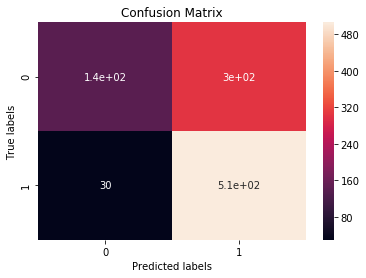

In [52]:
eclf1 = VotingClassifier(estimators=[('rdf_model',all_models['rdf_model']),
                                     ('linear_svc', all_models['linear_svc']), 
                                     ('nu_svc', all_models['nu_svc']),
                                        ], 
                                     voting='hard')
eclf1 = eclf1.fit(normalized_train_dataset, train_target)

print(eclf1.score( normalized_train_dataset, train_target))

print(eclf1.score( normalized_test_dataset, test_target))

expected = test_target
predicted_VotingClassifier = eclf1.predict(normalized_test_dataset)

#---------------------------------------------------------------------
#Отрисовка confusion_matrix

cm = metrics.confusion_matrix(expected, predicted_VotingClassifier)
print(cm)
spec1=cm[0][0]/(cm[0][0]+cm[0][1])
spec.append(spec1)
ch1=cm[1][1]/(cm[1][0]+cm[1][1])
ch.append(ch1)
buff_score=eclf1.score(normalized_test_dataset, test_target)
Score.append(buff_score)
print(metrics.classification_report(expected, predicted_VotingClassifier))
print('Точноть',buff_score)
print('Специфичность',spec1)
print('Чувствительность',ch1)
print('------------------------')  

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
#--------------------------------------------------------------------
#Результаты
f1ScoreWeighted=f1_score(test_target, predicted_VotingClassifier, average='weighted')
print("f1ScoreWeighted=",f1ScoreWeighted)

f1ScoreMacro=f1_score(test_target, predicted_VotingClassifier, average='macro')
print("f1ScoreMacro=",f1ScoreMacro)
      
f1ScoreBinary=f1_score(test_target, predicted_VotingClassifier, average='binary')
print("f1ScoreBinary=",f1ScoreBinary)




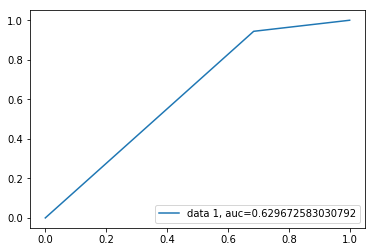

In [53]:
fpr, tpr, _ = metrics.roc_curve(expected,  predicted_VotingClassifier)
auc = metrics.roc_auc_score(expected, predicted_VotingClassifier)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Взвешенное голосование 'soft'

0.9979591836734694
0.9979591836734694
[[442   2]
 [  0 536]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       444
           1       1.00      1.00      1.00       536

   micro avg       1.00      1.00      1.00       980
   macro avg       1.00      1.00      1.00       980
weighted avg       1.00      1.00      1.00       980

Точноть 0.9979591836734694
Специфичность 0.9954954954954955
Чувствительность 1.0
--------------
f1ScoreWeighted= 0.997958780470459
f1ScoreMacro= 0.9979402331319807
f1ScoreBinary= 0.9981378026070763


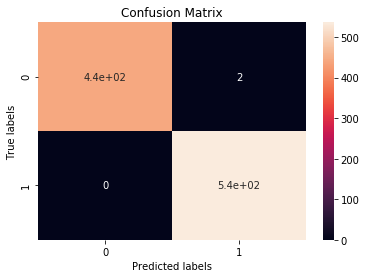

In [56]:
eclf2 = VotingClassifier(estimators=[('rdf_model',all_models['rdf_model']),
                                     ('nu_svc', all_models['nu_svc']),
                                     ('lgModel', all_models['lgModel']),
                                        ], 
                                     voting='soft')
eclf2 = eclf2.fit(normalized_train_dataset, train_target)

print(eclf2.score( normalized_train_dataset, train_target))

print(eclf2.score( normalized_test_dataset, test_target))

expected = test_target
predicted_VotingClassifier = eclf2.predict(normalized_test_dataset)

#---------------------------------------------------------------------
#Отрисовка confusion_matrix

cm = metrics.confusion_matrix(expected, predicted_VotingClassifier)
print(cm)
spec1=cm[0][0]/(cm[0][0]+cm[0][1])
spec.append(spec1)
ch1=cm[1][1]/(cm[1][0]+cm[1][1])
ch.append(ch1)
buff_score=eclf2.score(normalized_test_dataset, test_target)
Score.append(buff_score)
print(metrics.classification_report(expected, predicted_VotingClassifier))
print('Точноть',buff_score)
print('Специфичность',spec1)
print('Чувствительность',ch1)
print('--------------')  

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
#--------------------------------------------------------------------
#Результаты
f1ScoreWeighted=f1_score(test_target, predicted_VotingClassifier, average='weighted')
print("f1ScoreWeighted=",f1ScoreWeighted)

f1ScoreMacro=f1_score(test_target, predicted_VotingClassifier, average='macro')
print("f1ScoreMacro=",f1ScoreMacro)
      
f1ScoreBinary=f1_score(test_target, predicted_VotingClassifier, average='binary')
print("f1ScoreBinary=",f1ScoreBinary)

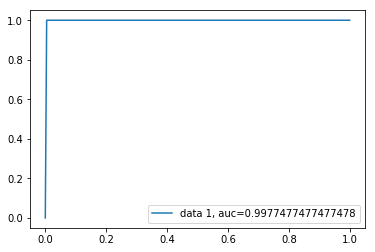

In [57]:
fpr, tpr, _ = metrics.roc_curve(expected,  predicted_VotingClassifier)
auc = metrics.roc_auc_score(expected, predicted_VotingClassifier)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()